In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


In [2]:
df= pd.read_csv("retails.csv")#reads the csv file and converts it into a dataframe
udf=df.head(499)#takes the first 500 values as the dataframe
udf['Date']=pd.to_datetime(udf['Date'],dayfirst=True) #converts it into datetime format
udf['TimeIndex'] = (udf['Date'] - udf['Date'].min()).dt.days #finds the number of days difference
udf.iloc[22]
udf['MonthNum'] = udf['Date'].dt.month#creates a new column MonthNum containing the months number(from 1 to 12)
udf['Month'] = udf['Date'].dt.to_period('M')

C:\Users\thejr\AppData\Local\Temp\ipykernel_19876\2408634885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf['Date']=pd.to_datetime(udf['Date'],dayfirst=True) #converts it into datetime format
C:\Users\thejr\AppData\Local\Temp\ipykernel_19876\2408634885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf['TimeIndex'] = (udf['Date'] - udf['Date'].min()).dt.days #finds the number of days difference
C:\Users\thejr\AppData\Local\Temp\ipykernel_19876\2408634885.py:6: SettingWithCopyWarning: 
A value 

In [3]:
#checking the dataframe
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        499 non-null    int64         
 1   Amount          499 non-null    float64       
 2   Profit          499 non-null    float64       
 3   Quantity        499 non-null    float64       
 4   Category        499 non-null    object        
 5   Sub-Category    499 non-null    object        
 6   PaymentMode     499 non-null    object        
 7   State           499 non-null    object        
 8   city            499 non-null    object        
 9   Gender          499 non-null    object        
 10  Date            499 non-null    datetime64[ns]
 11  random_numbers  499 non-null    int64         
 12  TimeIndex       499 non-null    int64         
 13  MonthNum        499 non-null    int32         
 14  Month           499 non-null    period[M]     
dtypes: dat

In [4]:
#checking for duplicates
udf.isnull().sum()

Order ID          0
Amount            0
Profit            0
Quantity          0
Category          0
Sub-Category      0
PaymentMode       0
State             0
city              0
Gender            0
Date              0
random_numbers    0
TimeIndex         0
MonthNum          0
Month             0
dtype: int64

In [5]:
#checking for any garbage values
for i in udf.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("***"*10)


Category
Clothing       286
Electronics    123
Furniture       90
Name: count, dtype: int64
******************************
Sub-Category
Saree               73
Hankerchief         65
Phones              40
Bookcases           39
Stole               38
Printers            35
Electronic Games    31
Chairs              30
Leggings            23
T-shirt             20
Kurti               18
Skirt               18
Accessories         17
Shirt               16
Trousers            15
Tables              12
Furnishings          9
Name: count, dtype: int64
******************************
PaymentMode
COD            228
UPI             84
Credit Card     79
Debit Card      71
EMI             37
Name: count, dtype: int64
******************************
State
Maharashtra          94
Madhya Pradesh       93
Rajasthan            31
Gujarat              27
Uttar Pradesh        25
Punjab               25
Delhi                24
West Bengal          22
Karnataka            20
Kerala               16
Bihar 

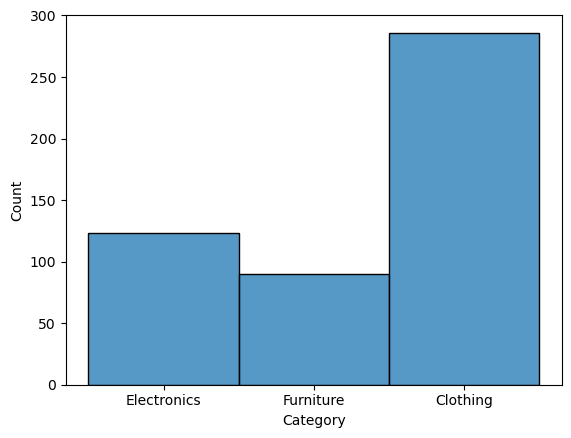

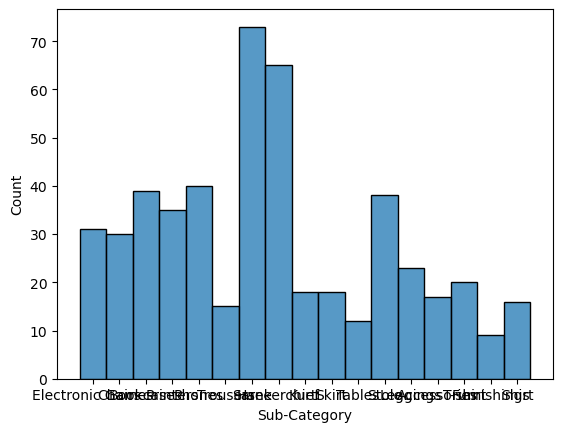

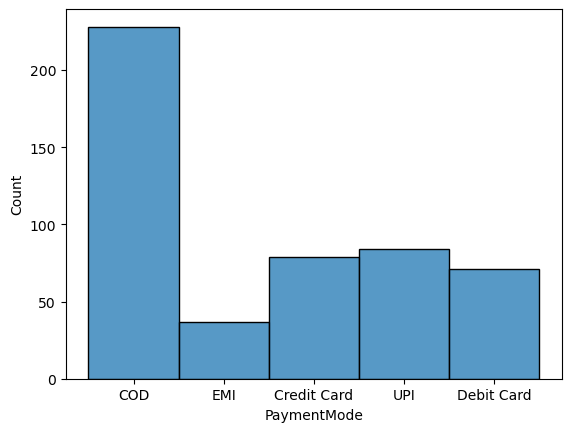

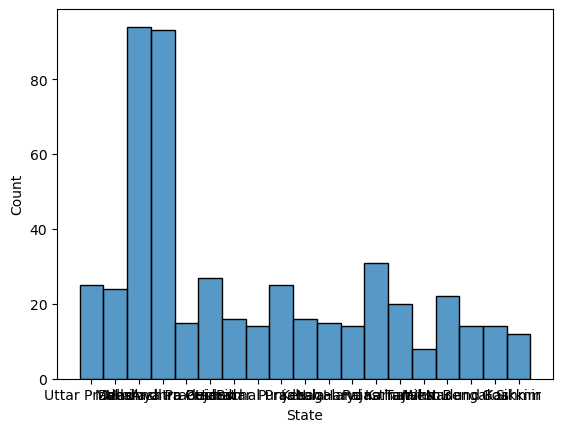

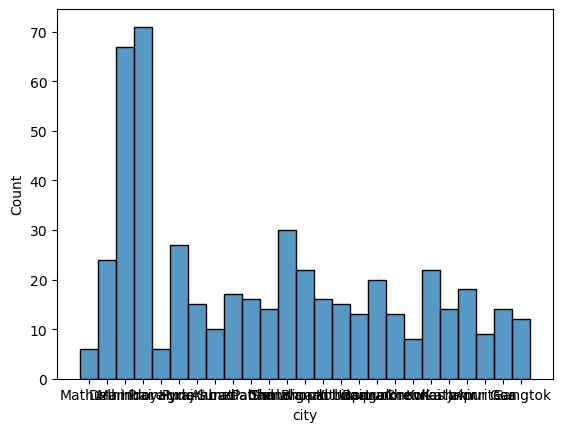

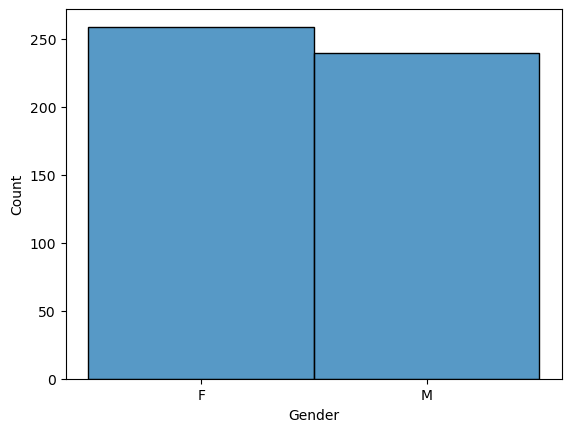

In [6]:
#EDA for objects
for i in udf.select_dtypes(include='object').columns:
    sns.histplot(data=udf,x=i)
    plt.show()

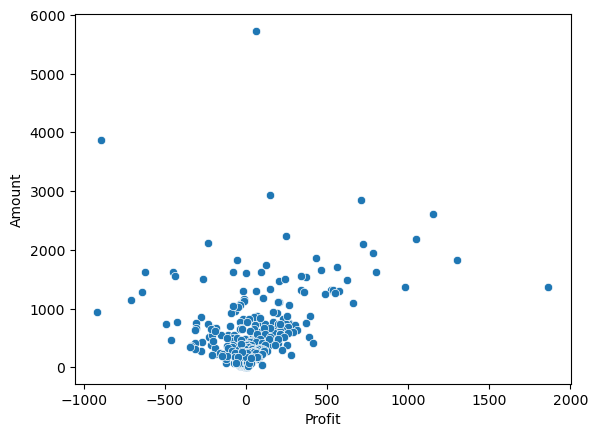

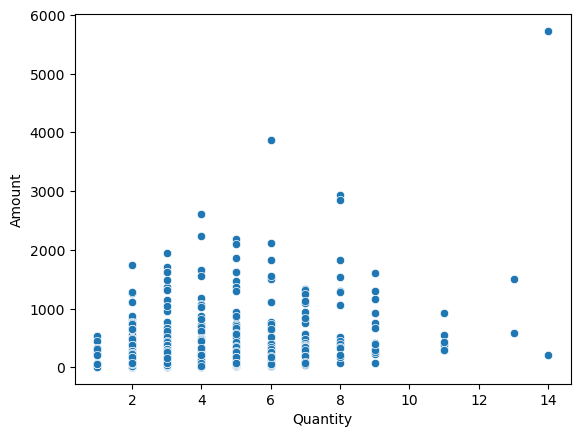

In [7]:
#EDA for profit and quantity
for i in ['Profit','Quantity']:
    sns.scatterplot(data=udf,x=i,y='Amount')
    plt.show()

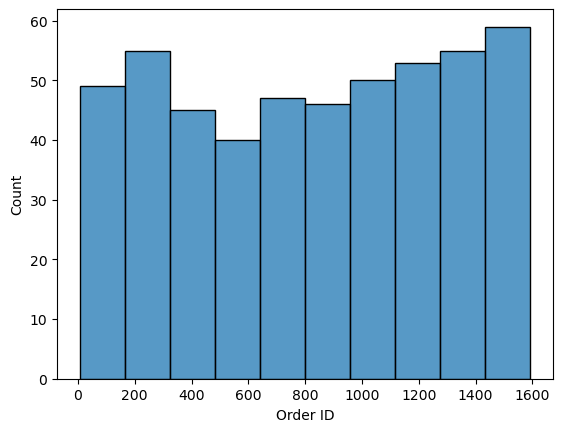

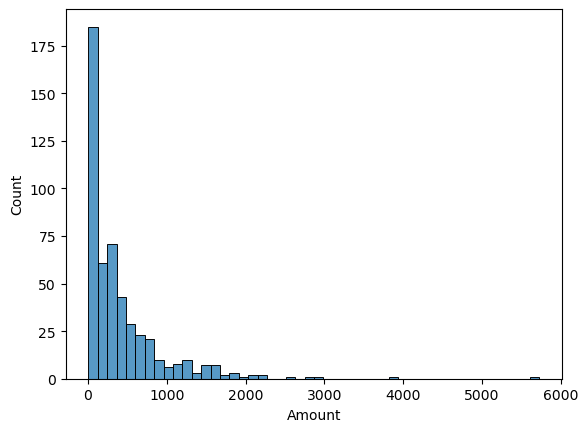

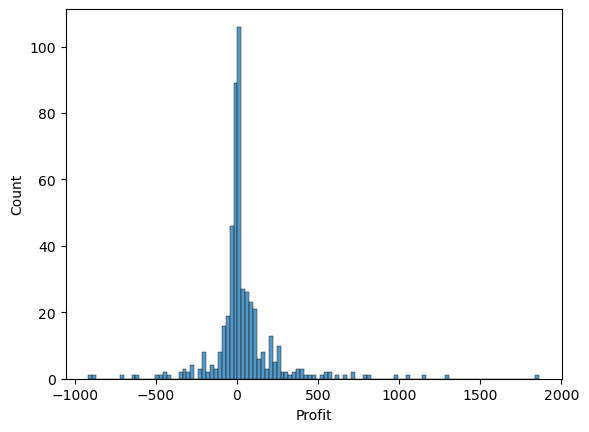

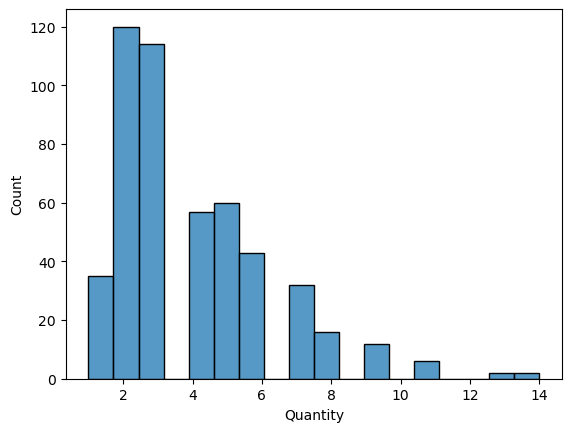

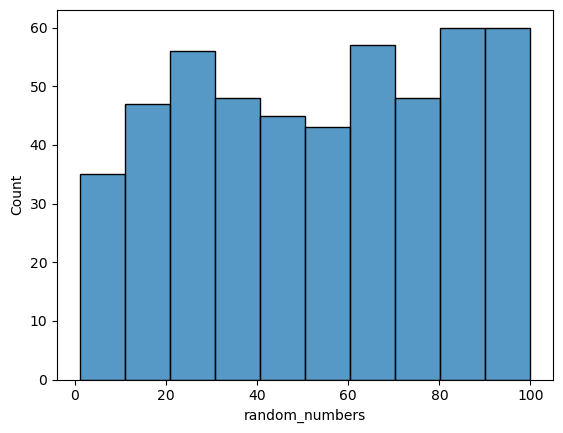

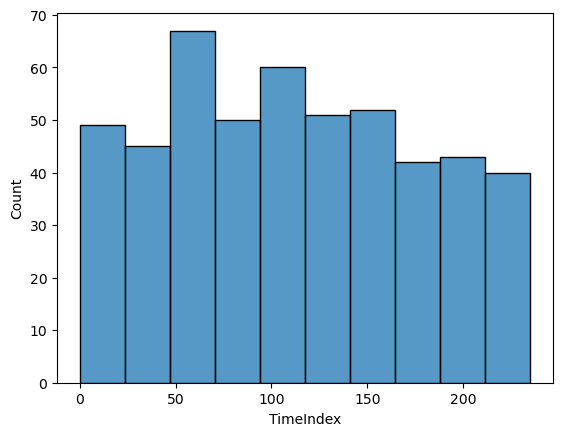

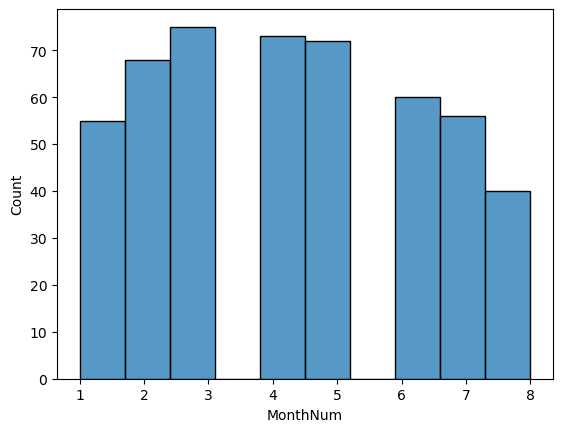

In [8]:
#EDA for numbers
for i in udf.select_dtypes(include='number').columns:
    sns.histplot(data=udf,x=i)
    plt.show()

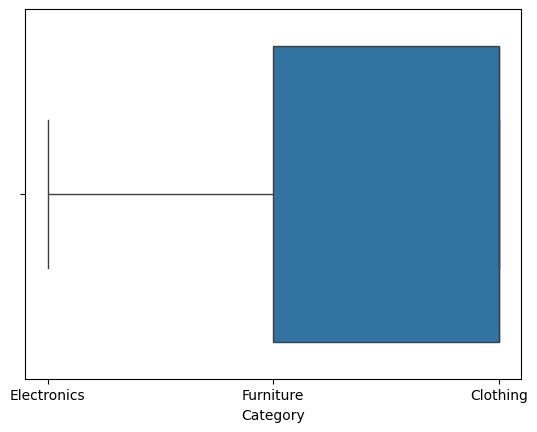

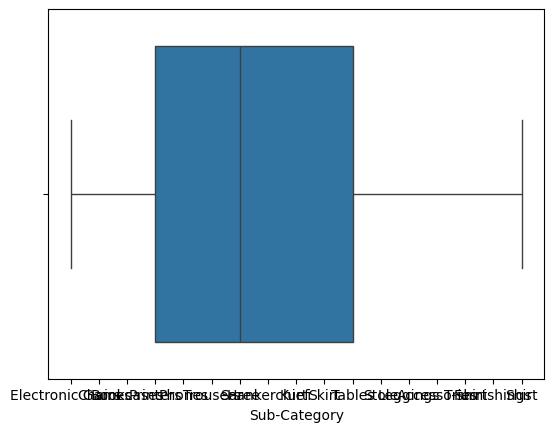

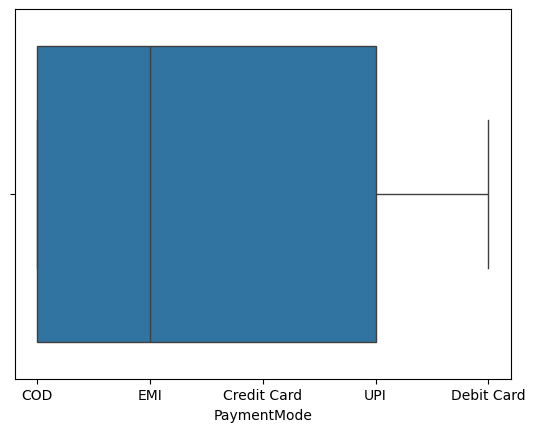

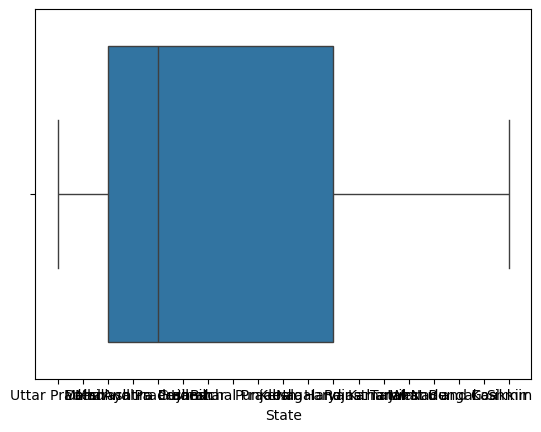

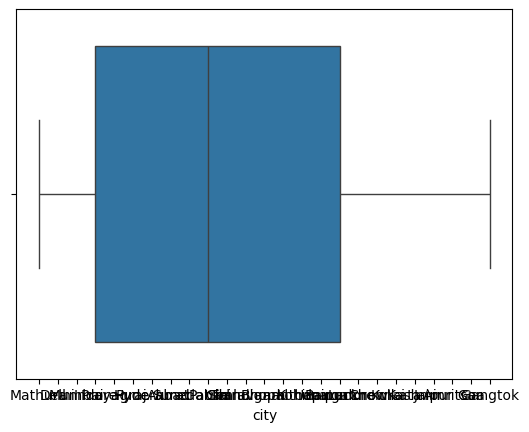

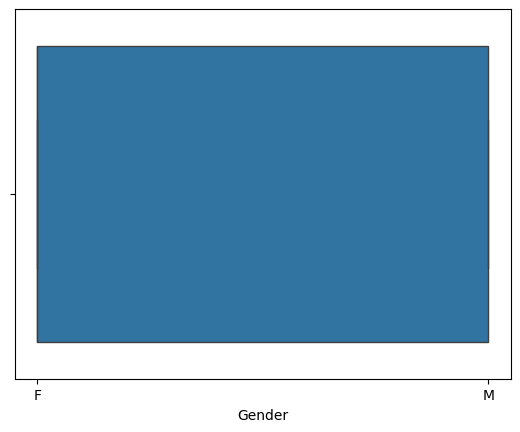

In [9]:
#boxplot for object to check for outliers
for i in udf.select_dtypes(include='object').columns:
    sns.boxplot(data=udf,x=i)
    plt.show()

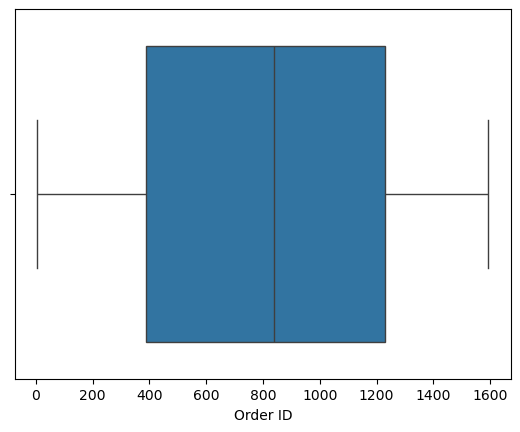

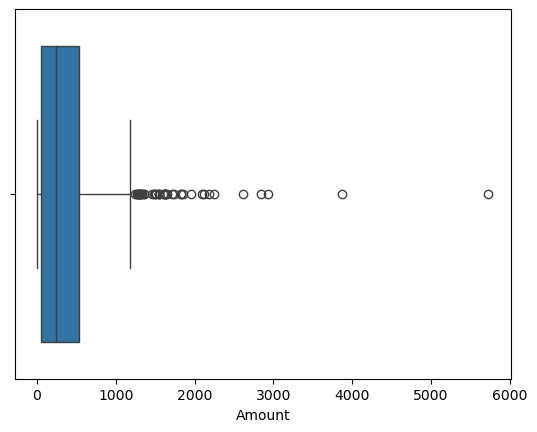

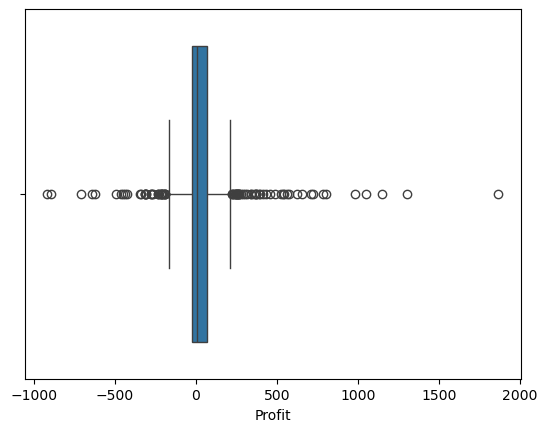

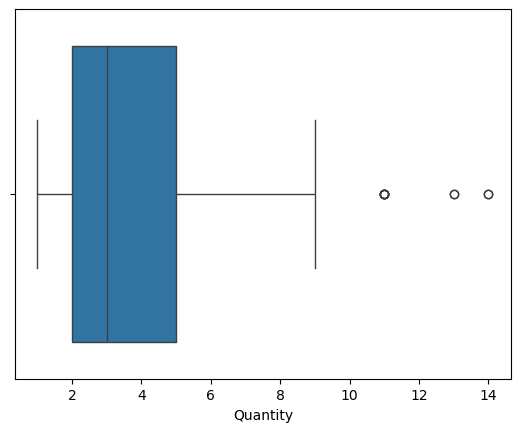

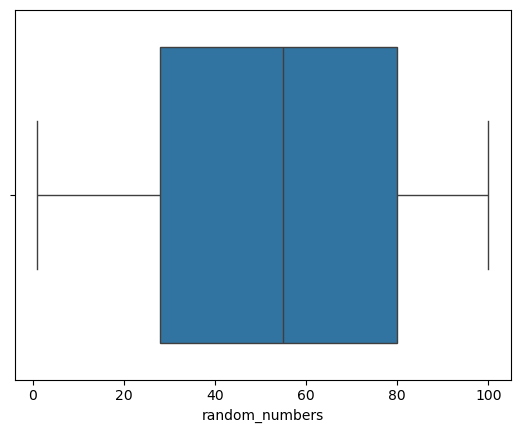

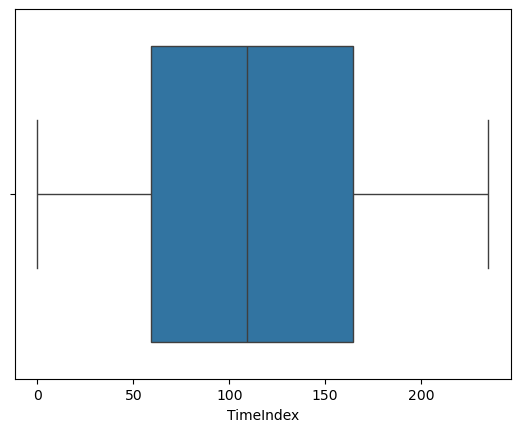

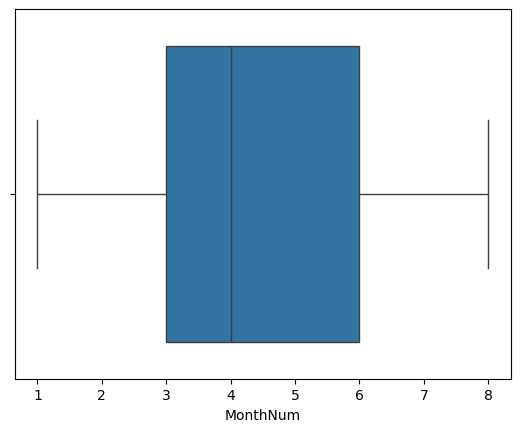

In [10]:
#boxplot for numbers to check for outliers
for i in udf.select_dtypes(include='number').columns:
    sns.boxplot(data=udf,x=i)
    plt.show()

In [11]:
#OUTLIERS TREATMENT
def limit(n):
    q1,q3=np.percentile(n,[25,75])
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    return ll,ul
for i in ['Amount','Profit','Quantity']:
    ll,ul=limit(udf[i])
    udf[i]=np.where(udf[i]<ll,ll,udf[i])#replaces the outliers lying below the lower limit with the lower limit value
    udf[i]=np.where(udf[i]>ul,ul,udf[i])#replaces the outliers lying above the upper limit with te upper limit value

C:\Users\thejr\AppData\Local\Temp\ipykernel_19876\3408049497.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf[i]=np.where(udf[i]<ll,ll,udf[i])#replaces the outliers lying below the lower limit with the lower limit value
C:\Users\thejr\AppData\Local\Temp\ipykernel_19876\3408049497.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf[i]=np.where(udf[i]>ul,ul,udf[i])#replaces the outliers lying above the upper limit with te upper limit value


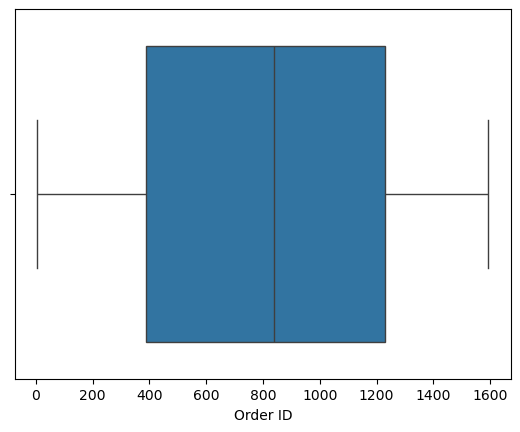

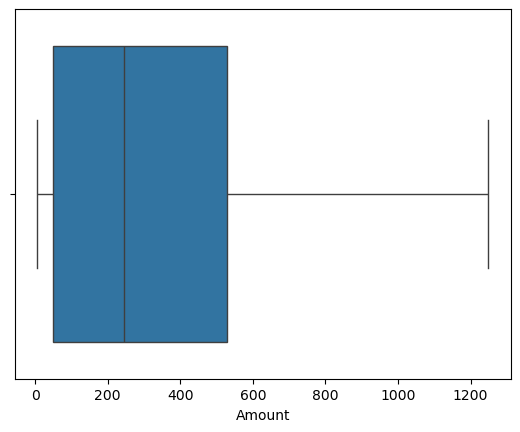

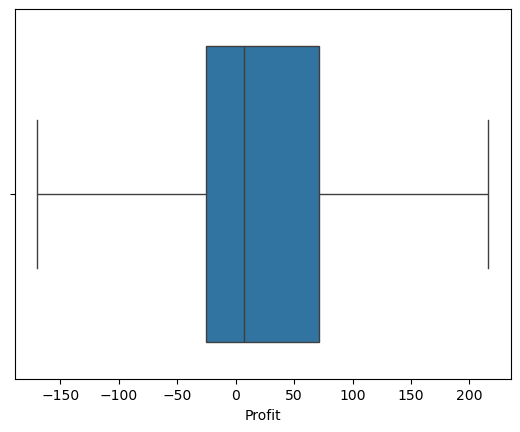

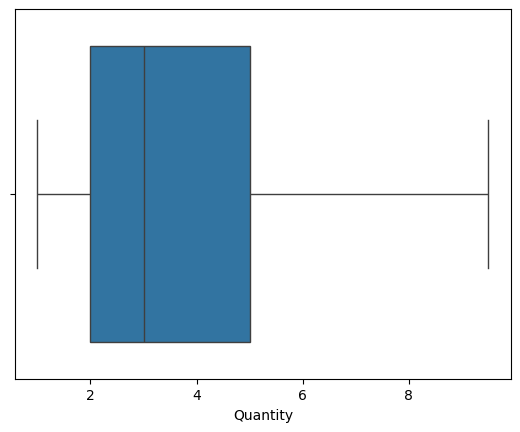

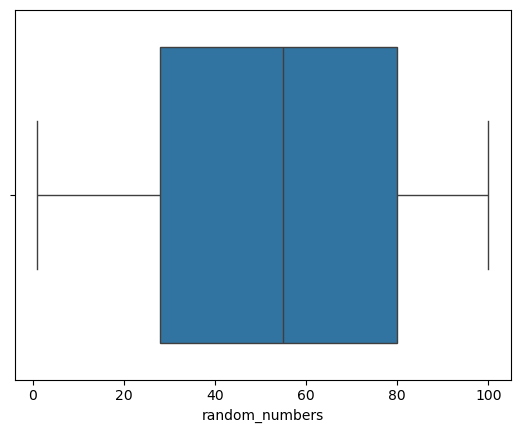

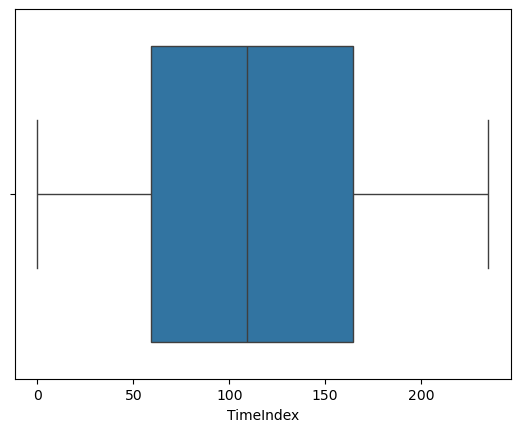

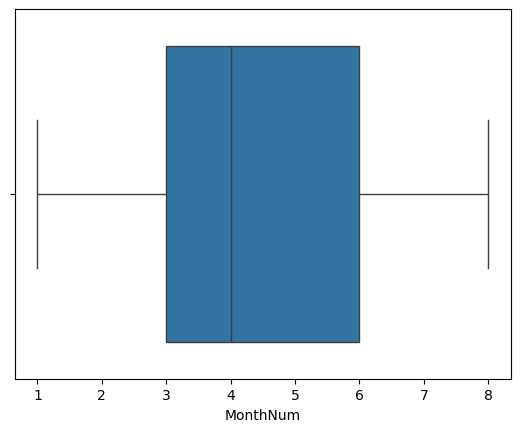

In [12]:
#boxplot of numbers after outlier treatement
for i in udf.select_dtypes(include='number').columns:
    sns.boxplot(data=udf,x=i)
    plt.show()

In [13]:
udf

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,State,city,Gender,Date,random_numbers,TimeIndex,MonthNum,Month
0,1063,1096.00,216.25,7.0,Electronics,Electronic Games,COD,Uttar Pradesh,Mathura,F,2023-01-01,78,0,1,2023-01
1,367,1248.75,64.00,9.5,Furniture,Chairs,EMI,Delhi,Delhi,M,2023-01-03,73,2,1,2023-01
2,1054,1248.75,146.00,8.0,Furniture,Bookcases,EMI,Uttar Pradesh,Mathura,M,2023-01-03,27,2,1,2023-01
3,408,1248.75,216.25,8.0,Electronics,Printers,Credit Card,Maharashtra,Mumbai,F,2023-01-03,49,2,1,2023-01
4,1237,1248.75,216.25,4.0,Electronics,Phones,Credit Card,Madhya Pradesh,Indore,M,2023-01-04,3,3,1,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1420,65.00,17.00,2.0,Clothing,T-shirt,UPI,Tamil Nadu,Chennai,F,2023-08-21,100,232,8,2023-08
495,942,72.00,-46.00,7.0,Clothing,Kurti,Debit Card,Goa,Goa,M,2023-08-21,53,232,8,2023-08
496,1010,168.00,-51.00,2.0,Furniture,Bookcases,COD,Sikkim,Gangtok,F,2023-08-21,81,232,8,2023-08
497,1485,165.00,30.00,3.0,Clothing,Stole,COD,Maharashtra,Mumbai,F,2023-08-23,96,234,8,2023-08


Profit Model - R2 Score: -0.3413018311611189
Profit Model - RMSE: 107.41446653609232
Quantity Model - R2 Score: -0.19945794627460622
Quantity Model - RMSE: 2.152096592650937


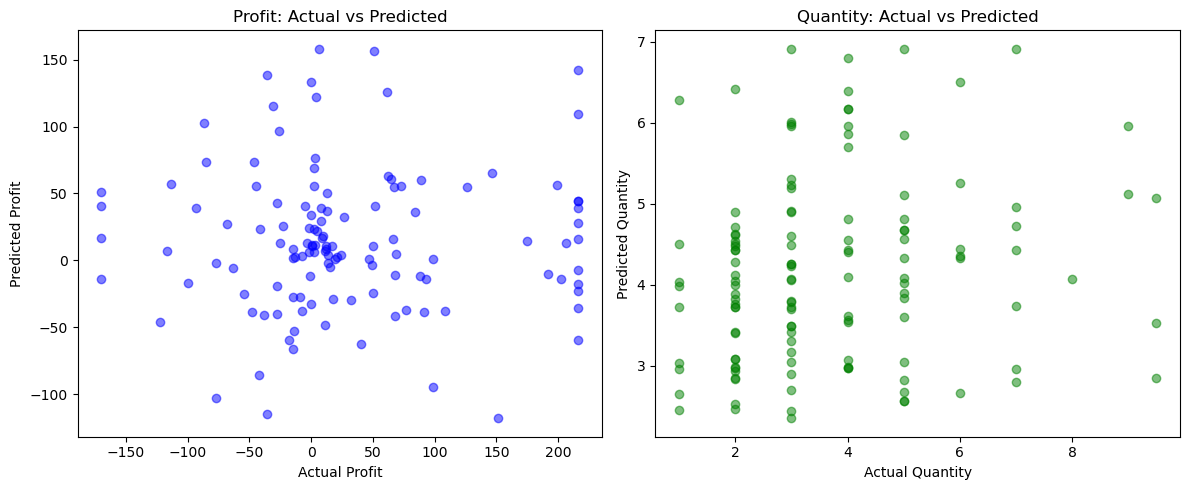

In [14]:
#Import the necessary 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

# Prepare data
data = udf.copy()
data['Month'] = data['Date'].dt.to_period('M').astype(str)

# Features and targets
X = pd.get_dummies(data[['Sub-Category', 'Month','State','city','Gender']], drop_first=True)#One hot encoding of objects
y_profit = data['Profit'] #sets profit as target
y_quantity = data['Quantity'] #sets quantity as target

# Train/test split(25% test and 75% train)
X_train, X_test, y_profit_train, y_profit_test, y_quantity_train, y_quantity_test = train_test_split(
    X, y_profit, y_quantity, test_size=0.25, random_state=42
)

# Train models using the RandomForestRegressor Model
model_profit = RandomForestRegressor(random_state=42)
model_quantity = RandomForestRegressor(random_state=42)

model_profit.fit(X_train, y_profit_train)
model_quantity.fit(X_train, y_quantity_train)

# Predictions
y_profit_pred = model_profit.predict(X_test)
y_quantity_pred = model_quantity.predict(X_test)

# Evaluation: gives us the accuracy and reliability of the model
print("Profit Model - R2 Score:", r2_score(y_profit_test, y_profit_pred))
print("Profit Model - RMSE:", np.sqrt(mean_squared_error(y_profit_test, y_profit_pred)))
print("Quantity Model - R2 Score:", r2_score(y_quantity_test, y_quantity_pred))
print("Quantity Model - RMSE:", np.sqrt(mean_squared_error(y_quantity_test, y_quantity_pred)))

# Visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_profit_test, y_profit_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Profit: Actual vs Predicted")

plt.subplot(1,2,2)
plt.scatter(y_quantity_test, y_quantity_pred, alpha=0.5, color='green')
plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title("Quantity: Actual vs Predicted")
plt.tight_layout()
plt.show()


In [15]:
#gives the top 5 sub-categories based on profit/quantity
def top_subcategories(metric='Profit', top_n=5):
    grouped = udf.groupby('Sub-Category')[metric].mean().sort_values(ascending=False)
    print(f"Top {top_n} Sub-Categories by {metric}:")
    print(grouped.head(top_n))
    grouped.head(top_n).plot(kind='bar', title=f"Top {top_n} Sub-Categories by {metric}")
    plt.ylabel(metric)
    plt.show()
#gives the relationship of profit and quantity for a specific subactegory
def correlation_profit_quantity(subcat):
    temp = udf[udf['Sub-Category'] == subcat]
    if temp.empty:
        print("Invalid Sub-Category.")
        return
    correlation = temp['Profit'].corr(temp['Quantity'])
    print(f"Correlation between Profit and Quantity for {subcat}: {correlation:.2f}")
    plt.scatter(temp['Quantity'], temp['Profit'])
    plt.xlabel("Quantity")
    plt.ylabel("Profit")
    plt.title(f"Profit vs Quantity for {subcat}")
    plt.show()
#finds the monthly trends of a given subcategory w.r.t Profit/Quantity
def monthly_growth(subcat, metric='Profit'):
    temp = udf[udf['Sub-Category'] == subcat].groupby('Month')[metric].sum().reset_index()
    temp['Month'] = temp['Month'].dt.to_timestamp()
    temp = temp.sort_values('Month')
    temp['Growth (%)'] = temp[metric].pct_change() * 100
    plt.plot(temp['Month'], temp['Growth (%)'], marker='o')
    plt.title(f"Monthly Growth Rate in {metric} for {subcat}")
    plt.ylabel("Growth (%)")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
#gives the seasonal view of trends of a subcategory W.R.T chosen metric
def seasonal_analysis(subcat, metric='Profit'):
    temp = udf[udf['Sub-Category'] == subcat]
    temp['Month_Num'] = temp['Date'].dt.month
    grouped = temp.groupby('Month_Num')[metric].mean()
    grouped.plot(kind='bar', title=f"Average {metric} per Month for {subcat}")
    plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i+1] for i in range(12)], rotation=45)
    plt.ylabel(f"Average {metric}")
    plt.show()
#Compares subcategories based on chosen metric
def compare_subcategories(subcat1, subcat2, metric='Profit'):
    temp = udf[udf['Sub-Category'].isin([subcat1, subcat2])]
    pivot = temp.pivot_table(index='Date', columns='Sub-Category', values=metric, aggfunc='sum').fillna(0)
    pivot.plot(marker='o')
    plt.title(f"Comparison of {metric} for {subcat1} vs {subcat2}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.grid(True)
    plt.show()
#gives the heatmap of chosen metric between the months and subcategory
def sales_heatmap(metric='Profit'):
    heatmap_data = udf.pivot_table(index='Sub-Category', columns='Month', values=metric, aggfunc='sum').fillna(0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
    plt.title(f"{metric} Heatmap by Sub-Category and Month")
    plt.xticks(rotation=90)
    plt.show()

#Detects anomaies in the data
def detect_anomalies(subcat, metric='Profit'):
    temp = udf[udf['Sub-Category'] == subcat].groupby('Month')[metric].sum().reset_index()
    temp['Month'] = temp['Month'].dt.to_timestamp()
    mean = temp[metric].mean()
    std = temp[metric].std()
    anomalies = temp[(temp[metric] > mean + 2*std) | (temp[metric] < mean - 2*std)]

    plt.plot(temp['Month'], temp[metric], label='Normal')
    plt.scatter(anomalies['Month'], anomalies[metric], color='red', label='Anomalies')
    plt.title(f"Anomaly Detection in {metric} for {subcat}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    if anomalies.empty:
        print("No anomalies detected.")
    else:
        print("Detected anomalies:")
        print(anomalies)
def predict_subcategory_future_sales(data, sub_category, n_months):#goes into the prediction function
    # Step 1: Filter and aggregate
    df = data[data['Sub-Category'] == sub_category].copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Quantity': 'sum', 'Profit': 'sum'}).reset_index()
    
    # Step 2: Feature engineering
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['TimeIndex'] = range(len(df))
    
    # Step 3: Train on full data
    X = df[['TimeIndex', 'Month', 'Year']]
    y = df['Quantity']  
                
    model = RandomForestRegressor()
    model.fit(X, y)
    

    last_date = df['Date'].max()
    future_dates = [last_date + relativedelta(months=i+1) for i in range(n_months)]

    future_df = pd.DataFrame({'Date': future_dates,'Month': [d.month for d in future_dates],'Year': [d.year for d in future_dates],'TimeIndex': [df['TimeIndex'].max() + i + 1 for i in range(n_months)]})

    future_X = future_df[['TimeIndex', 'Month', 'Year']]

                
    future_df['Predicted Quantity'] = np.round(model.predict(future_X)).astype(int)
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Quantity'], label='Historical Quantity')
    plt.plot(future_df['Date'], future_df['Predicted Quantity'], label='Predicted Future Quantity', linestyle='--')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.title(f'Future Sales Prediction for {sub_category}')
    plt.grid(True)
    plt.show()
                

    return future_df

In [16]:
# formats the date axis of a plot (such as a time series plot) in a more readable way
import matplotlib.dates as mdates

def format_date_axis(ax):
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # e.g. Jan-2023
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)


In [17]:
#The main function that acts as an interface
def main():
    while True:
        #prints the options
        print("\\nMENU OPTIONS:")
        print("1. Show past data for a sub-category")
        print("2. Predict future sales (Profit/Quantity) for a sub-category")
        print("3. Find peak sale month of a sub-category")
        print("4. Top Sub-Categories")
        print("5. Correlation between Profit and Quantity")
        print("6. Monthly Growth Rate")
        print("7. Seasonal Sales Analysis")
        print("8. Compare Two Sub-Categories")
        print("9. Sales Heatmap")
        print("10. Anomaly Detection")
        print("11. Exit")

        choice = input("Enter choice: ")
#for option 1:
        if choice == '1':
            subcat = input("Enter Sub-Category: ")
            filtered = udf[udf['Sub-Category'].str.lower() == subcat.lower()]#finds rows matching the entered subcategory,ignoring case
            if filtered.empty: #if anon-existent subcategory is entered,prints an error text
                print("Sub-category not found.")
            else:
                fig, ax = plt.subplots(2, 1, figsize=(10, 6))
                ax[0].plot(filtered['Date'], filtered['Profit'], marker='o')
                ax[0].set_title(f"{subcat} - Profit over Time")
                format_date_axis(ax[0])

                ax[1].plot(filtered['Date'], filtered['Quantity'], marker='o', color='green')
                ax[1].set_title(f"{subcat} - Quantity over Time")
                format_date_axis(ax[1])

                plt.tight_layout()
                plt.show()
#for option 2:
        elif choice == '2':
            sub_category= input("Enter Sub-Category: ")
            n_months=int(input("Enter no.of months:"))
            data=udf
            print(predict_subcategory_future_sales(data, sub_category, n_months))
#for Option 3:
        elif choice == '3':
            subcat = input("Enter Sub-Category: ")
            sub_df = udf[udf['Sub-Category'].str.lower() == subcat.lower()]
            if sub_df.empty:
                print("Sub-category not found.")
                continue
            sub_df['Month'] = sub_df['Date'].dt.to_period('M')
            monthly_sales = sub_df.groupby('Month')['Quantity'].sum()
            peak_month = monthly_sales.idxmax()
            print(f"Peak sales for {subcat} occurred in: {peak_month.strftime('%B %Y')}")
#for option 4:
        elif choice == '4':
            metric = input("Choose metric (Profit/Quantity): ")
            top_subcategories(metric)
#for option 5:
        elif choice == '5':
            subcat = input("Enter Sub-Category: ")
            correlation_profit_quantity(subcat)
#for option 6:
        elif choice == '6':
            subcat = input("Enter Sub-Category: ")
            metric = input("Choose metric (Profit/Quantity): ")
            monthly_growth(subcat, metric)
#for option 7:
        elif choice == '7':
            subcat = input("Enter Sub-Category: ")
            metric = input("Choose metric (Profit/Quantity): ")
            seasonal_analysis(subcat, metric)
#for option 8:
        elif choice == '8':
            subcat1 = input("Enter first Sub-Category: ")
            subcat2 = input("Enter second Sub-Category: ")
            metric = input("Choose metric (Profit/Quantity): ")
            compare_subcategories(subcat1, subcat2, metric)
#for option 9:
        elif choice == '9':
            metric = input("Choose metric (Profit/Quantity): ")
            sales_heatmap(metric)
#for option 10:          
        elif choice == '10':
            subcat = input("Enter Sub-Category: ")
            metric = input("Choose metric (Profit/Quantity): ")
            detect_anomalies(subcat, metric)
#for option 11:
        elif choice == '11':
            print("Exiting.")
            break #Ends the program
        else:
            print("Invalid option. Try again.")


\nMENU OPTIONS:
1. Show past data for a sub-category
2. Predict future sales (Profit/Quantity) for a sub-category
3. Find peak sale month of a sub-category
4. Top Sub-Categories
5. Correlation between Profit and Quantity
6. Monthly Growth Rate
7. Seasonal Sales Analysis
8. Compare Two Sub-Categories
9. Sales Heatmap
10. Anomaly Detection
11. Exit


Enter choice:  2
Enter Sub-Category:  Phones
Enter no.of months: 6


C:\Users\thejr\AppData\Local\Temp\ipykernel_19876\3622013284.py:87: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Quantity': 'sum', 'Profit': 'sum'}).reset_index()


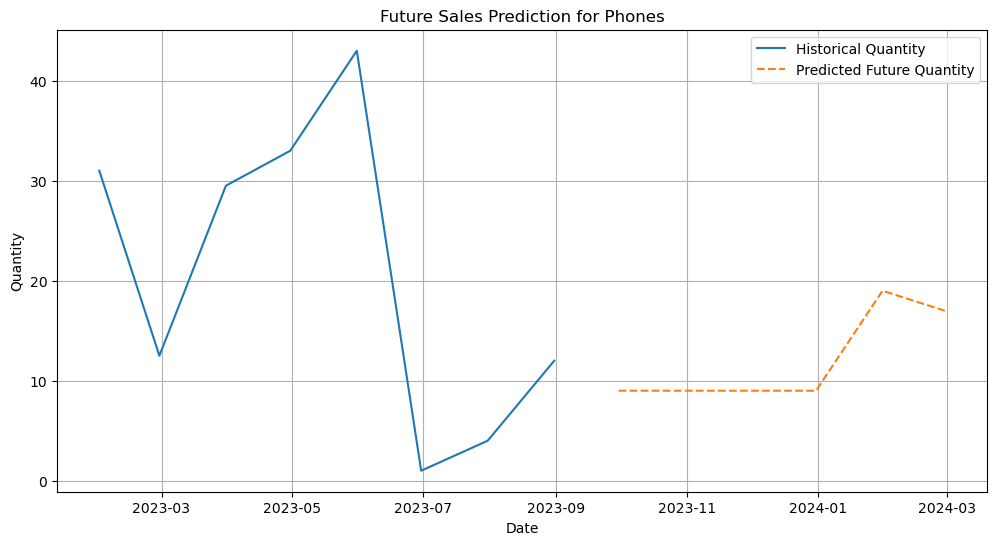

        Date  Month  Year  TimeIndex  Predicted Quantity
0 2023-09-30      9  2023          8                   9
1 2023-10-31     10  2023          9                   9
2 2023-11-30     11  2023         10                   9
3 2023-12-31     12  2023         11                   9
4 2024-01-31      1  2024         12                  19
5 2024-02-29      2  2024         13                  17
\nMENU OPTIONS:
1. Show past data for a sub-category
2. Predict future sales (Profit/Quantity) for a sub-category
3. Find peak sale month of a sub-category
4. Top Sub-Categories
5. Correlation between Profit and Quantity
6. Monthly Growth Rate
7. Seasonal Sales Analysis
8. Compare Two Sub-Categories
9. Sales Heatmap
10. Anomaly Detection
11. Exit


Enter choice:  2
Enter Sub-Category:  Kurti
Enter no.of months: 8


C:\Users\thejr\AppData\Local\Temp\ipykernel_19876\3622013284.py:87: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Quantity': 'sum', 'Profit': 'sum'}).reset_index()


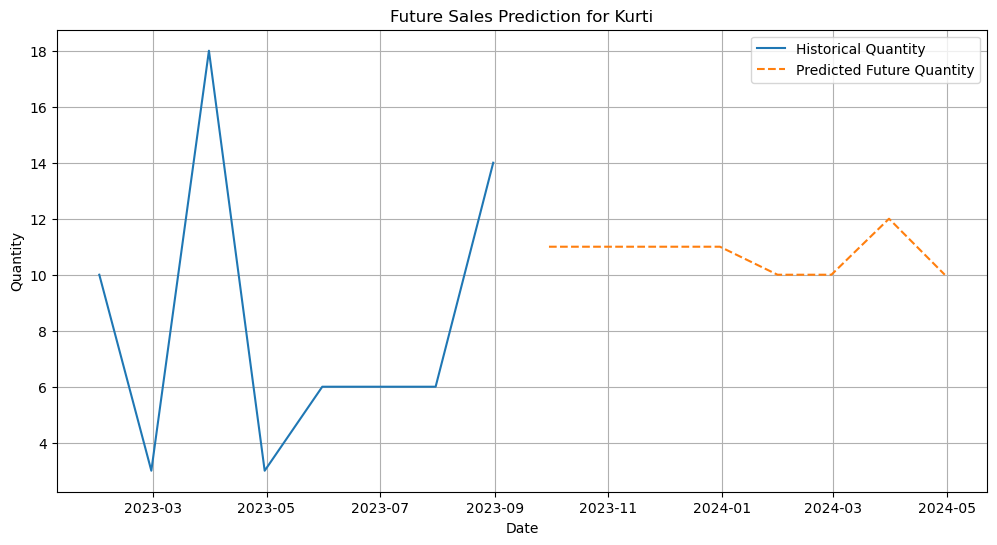

        Date  Month  Year  TimeIndex  Predicted Quantity
0 2023-09-30      9  2023          8                  11
1 2023-10-31     10  2023          9                  11
2 2023-11-30     11  2023         10                  11
3 2023-12-31     12  2023         11                  11
4 2024-01-31      1  2024         12                  10
5 2024-02-29      2  2024         13                  10
6 2024-03-31      3  2024         14                  12
7 2024-04-30      4  2024         15                  10
\nMENU OPTIONS:
1. Show past data for a sub-category
2. Predict future sales (Profit/Quantity) for a sub-category
3. Find peak sale month of a sub-category
4. Top Sub-Categories
5. Correlation between Profit and Quantity
6. Monthly Growth Rate
7. Seasonal Sales Analysis
8. Compare Two Sub-Categories
9. Sales Heatmap
10. Anomaly Detection
11. Exit


Enter choice:  11


Exiting.


In [18]:
main()

